## santoshhulbutti@gmail.com | Flip Robo Technologies | Project Internship #31
### Project #6: Spam SMS Classification

In [1]:
#importing all the necessary libraries needed to do classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import tensorflow as tf

import re
import nltk

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
data_url = 'https://raw.githubusercontent.com/santoshhulbutti/Internship31/main/Spam%20SMS%20Classification/spam.csv'
data = pd.read_csv(data_url, encoding = 'latin_1')

In [3]:
#reading the dataset
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#Checking target valriable distribution
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

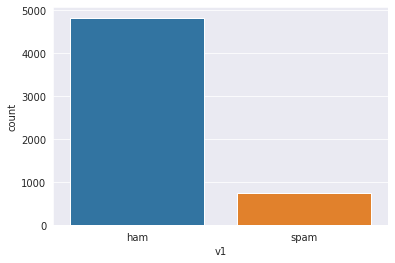

In [5]:
sns.countplot(data['v1']);

## Observation : 
### The Input data has data imbalance. We will use oversampling technique (SMOTE) to balance the dataset.
## 

In [6]:
# Checking nunique, missing & datatypes of each column
data_info = pd.DataFrame(list(zip(data.nunique(), data.isnull().sum(), data.dtypes)),
                         columns = ['unique_entries', 'missing values', 'Dtypes'],
                         index=data.columns)

data_info

,unique_entries,missing values,Dtypes
v1,2,0,object
v2,5169,0,object
Unnamed: 2,43,5522,object
Unnamed: 3,10,5560,object
Unnamed: 4,5,5566,object


## Observation : 
### The Input data had 3 unnamed features with unique entries less than 45. We will check the dataset.
## 

In [7]:
# Checcking non null entries in 'Unnamed: 3' feature
data[data['Unnamed: 2'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [8]:
# Checcking non null entries in 'Unnamed: 3' feature
data[data['Unnamed: 3'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,SHE SHUDVETOLD U. DID URGRAN KNOW?NEWAY,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [9]:
# Checcking non null entries in 'Unnamed: 4' feature
data[data['Unnamed: 4'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [10]:
for i in data[data['Unnamed: 4'].notnull()].index:
    print('    ')
    print(data[data['Unnamed: 4'].notnull()]['v2'].loc[i])
    print(data[data['Unnamed: 4'].notnull()]['Unnamed: 2'].loc[i])
    print(data[data['Unnamed: 4'].notnull()]['Unnamed: 3'].loc[i])
    print(data[data['Unnamed: 4'].notnull()]['Unnamed: 4'].loc[i])
    print('    ')
    print('##'*50)

    
\Wen u miss someone
 the person is definitely special for u..... But if the person is so special
 why to miss them
 just Keep-in-touch\" gdeve.."
    
####################################################################################################
    
Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM
GN
GE
GNT:-)"
    
####################################################################################################
    
I just lov this line: \Hurt me with the truth
 I don't mind
i wil tolerat.bcs ur my someone..... But
 Never comfort me with a lie\" gud ni8 and sweet dreams"
    
####################################################################################################
    
\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEAD 2 DA WRLD. BEEN SLEEPING ON DA SOFA ALL DAY
 HAD A COOL NYTHO
 TX 4 FONIN HON
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""
    
###############################

## Observation : 
### From above we can clearly see that the features 'Unnamed: 2', 'Unnamed: 3', & 'Unnamed: 4' also contain some part of the messages. It is necessary to concatenate all the text from 'Unnamed: 2', 'Unnamed: 3', & 'Unnamed: 4' with 'v2' column.
## 

In [11]:
# Copying dataset
data1 = data.copy()

In [12]:
# Concatenating text from Unnamed columns to v2 column
for j in [2, 3, 4]:
    column = 'Unnamed: ' + str(j)
    for i in data[data[column].notnull()].index:
        data1['v2'].loc[i] = data['v2'].loc[i] +' '+data[column].loc[i] # Concatenating text from Unnamed columns to v2 column
        data1[column].loc[i] = np.nan # clearing text after concatenating in unnamed column

In [13]:
## Checking data again for missing values
data1_info = pd.DataFrame(list(zip(data1.nunique(), data1.isnull().sum(), data1.dtypes)),
                         columns = ['unique_entries', 'missing values', 'Dtypes'],
                         index=data1.columns)

data1_info

,unique_entries,missing values,Dtypes
v1,2,0,object
v2,5169,0,object
Unnamed: 2,0,5572,object
Unnamed: 3,0,5572,object
Unnamed: 4,0,5572,object


In [14]:
#dropping unnamed features
data1.drop(columns = ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)
data1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
## downloading necessary packages of NLTK
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
#Adding a column of numbers of charachters,words and sentences in each msg
data1_temp = data1.copy()
data1_temp["No_of_Characters"] = data1_temp["v2"].apply(len)
data1_temp["No_of_Words"]=data1_temp.apply(lambda row: nltk.word_tokenize(row["v2"]), axis=1).apply(len)
data1_temp["No_of_sentence"]=data1_temp.apply(lambda row: nltk.sent_tokenize(row["v2"]), axis=1).apply(len)

data1_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.612527,59.953357,2.0,36.0,62.0,123.0,910.0
No_of_Words,5572.0,18.823762,13.831427,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.975233,1.420077,1.0,1.0,1.0,2.0,28.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bd96dec70>,
      dtype=object)

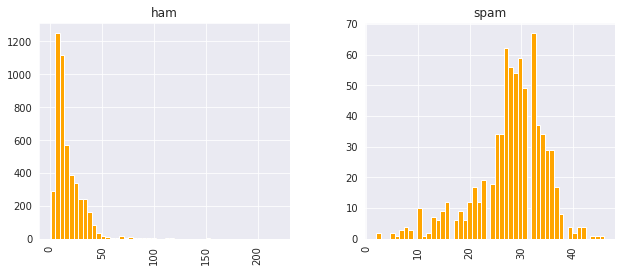

In [18]:
#Plotting the histogram
data1_temp.hist(column='No_of_Words', by='v1', bins=50,figsize=(10,4),color="orange")

## Observation : 
### Messages with text length less than 100 were actually not spam. But those texts with text length less than 40 were spam class.
## 

<Figure size 864x576 with 0 Axes>

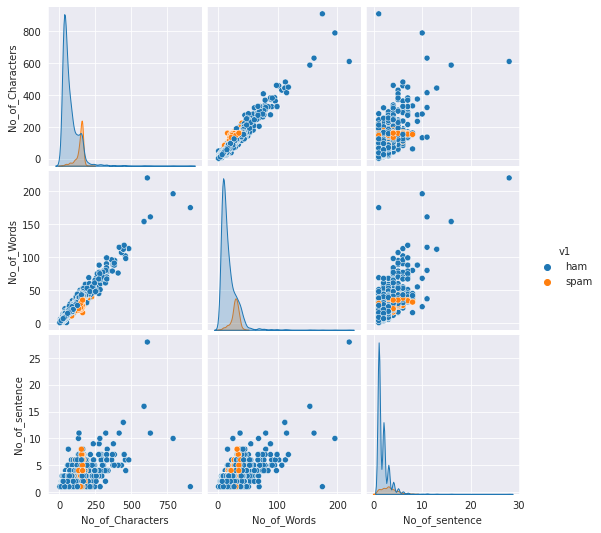

In [19]:
plt.figure(figsize=(12,8))
sns.pairplot(data=data1_temp, hue="v1")
plt.show()

## Observation : 
### From above plot we can say Lengthy text messages are not to be considered spam.
## 

In [20]:
print(data1.duplicated().sum())
print(' ')
print('Total percentage of the duplicate rows in data1 is: ', round(data1.duplicated().sum()*100/data1.shape[0],2))

403
 
Total percentage of the duplicate rows in data1 is:  7.23


In [21]:
# remove duplicates
data2 = data1.drop_duplicates(keep='first')

In [22]:
## Renaming the feature name
data2.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [23]:
data2

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
## Checking for Duplicates
data2.duplicated().sum()

0

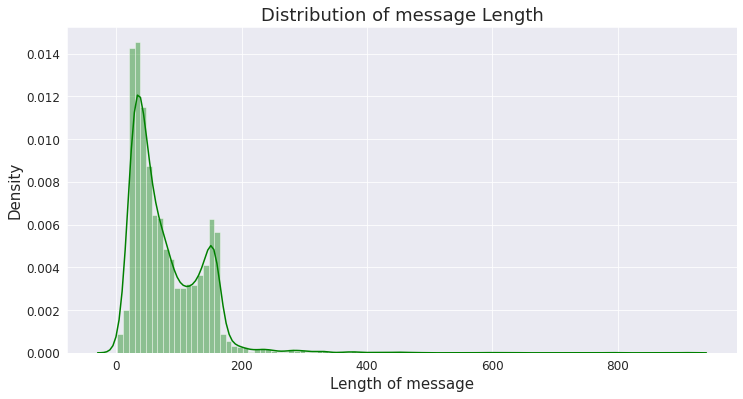

In [25]:
#Distribution of message length
plt.figure(figsize=(12,6))
comment_len = data2['message'].str.len()
sns.distplot(comment_len, bins=100, color = 'green')

plt.title("Distribution of message Length", fontsize=18)
plt.ylabel('Density', fontsize=15)
plt.xlabel('Length of message', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Observation : 
### Overall, the dataset has text messages varying from 0 to 200 text length. Those above 200 are seem to be outliers.
## 

In [26]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#creating an instance of lemmatization
lemmatizer = WordNetLemmatizer()

In [27]:
data2.reset_index(drop=True, inplace=True) #resetting the indices

In [28]:
# apply stopwords lemmatize on text messages
corpus = []
for sentence in data2['message']:
    review = re.sub('[^a-zA-Z]', ' ', sentence)
    review = review.lower()
    review = review.replace('\n', ' ')
    review = review.replace('\\','')
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [29]:
# concatenating cleaned sentences to original data
data3 = pd.concat([data2, pd.DataFrame(corpus, columns = ['text_lemmatize'])], axis=1)
data3.to_csv('cleaned_nb.csv',index=False)  ## Saving the cleaned data in csv format

In [30]:
data3

,label,message,text_lemmatize
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5165,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5166,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5167,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [31]:
## Checking for null values again
data3.isnull().sum()

label             0
message           0
text_lemmatize    0
dtype: int64

In [32]:
# importing wordcloud to display the wordcloud image
from wordcloud import WordCloud

In [33]:
# Separating Spam & ham data for wordcloud
data3_ham = data3[data3['label'] == 'ham']
data3_spam = data3[data3['label'] == 'spam']

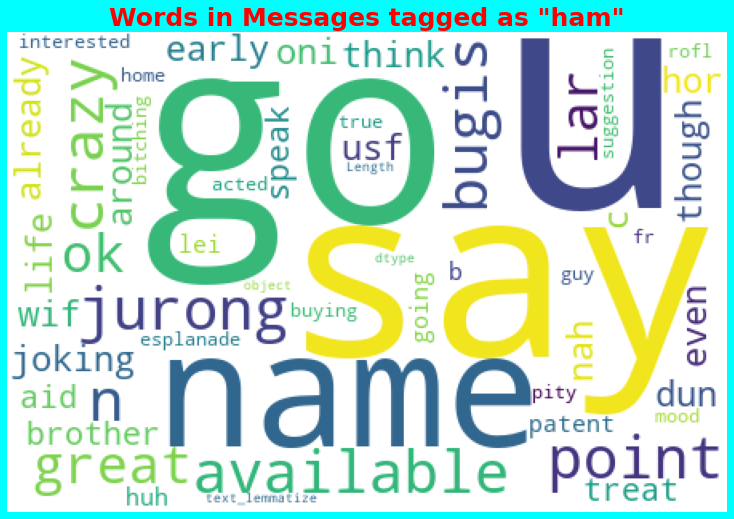

In [34]:
# Plotting for ham messages
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(data3_ham['text_lemmatize']))
plt.figure(figsize=(10,10),facecolor='cyan')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.title(label='Words in Messages tagged as "ham"', fontdict={'fontsize':25,'fontweight':'bold', 'color':'red'})
plt.show()

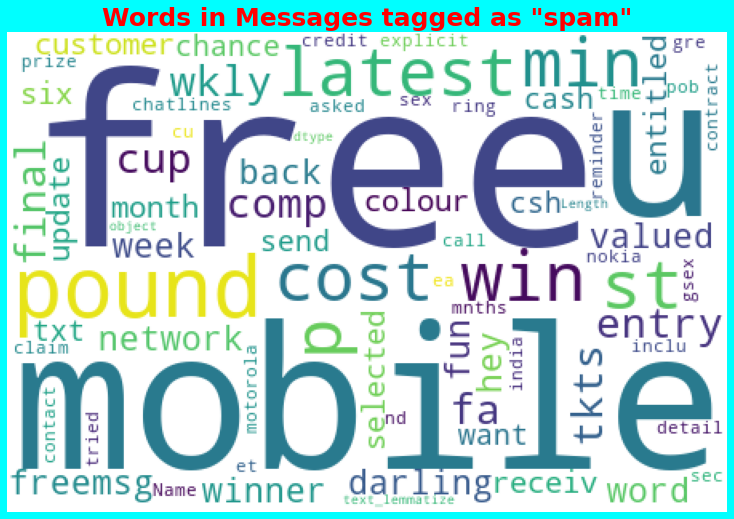

In [35]:
# Plotting for spam messages
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(data3_spam['text_lemmatize']))
plt.figure(figsize=(10,10),facecolor='cyan')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.title(label='Words in Messages tagged as "spam"', fontdict={'fontsize':25,'fontweight':'bold', 'color':'red'})
plt.show()

In [37]:
#Label encode the Target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data3["Target"] = label_encoder.fit_transform(data3["label"])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Creating an instance of Count Vectoriser
cv = CountVectorizer()

# Creating an instance of TFIDF Vectoriser
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
# creating a separate feature with countvectoriser
X1 = cv.fit_transform(data3['text_lemmatize']).toarray()

# creating a separate feature with TFIDF vectoriser
X2 = tfidf.fit_transform(data3['text_lemmatize']).toarray()

#Creating a target feature
y = data3["Target"]

In [40]:
## Applying Oversampling to balence target feature
from imblearn.over_sampling import SMOTE

## Creating an instance
oversample = SMOTE()

## Applying on feature with countvectorised data
x1, Y = oversample.fit_resample(X1, y)
Y.value_counts()

0    4516
1    4516
Name: Target, dtype: int64

In [41]:
## Creating second instance
oversample_2 = SMOTE()

## Applying on feature with countvectorised data
x2, Y = oversample.fit_resample(X2, y)
Y.value_counts()

0    4516
1    4516
Name: Target, dtype: int64

In [43]:
## Importing necessary machine learning algorithms & also evaluation metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import  confusion_matrix, classification_report, f1_score,
                            roc_auc_score, accuracy_score, roc_curve, auc, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

## 
# using CountVectorizer as a text vectorizing method & checking the model accuracy

In [44]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, x1, Y, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,x1, Y, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [45]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gaussian NB Classifier model..
 
Best Random_state number for splitting the data is:  112
 
Accuracy score for Train : 96.80%
Accuracy score for Test : 94.91%
Confusion Matrix :

[[ 997   93]
 [  22 1146]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      1090
           1       0.92      0.98      0.95      1168

    accuracy                           0.95      2258
   macro avg       0.95      0.95      0.95      2258
weighted avg       0.95      0.95      0.95      2258

Cross Validation score at best cv=3 is : 93.25%


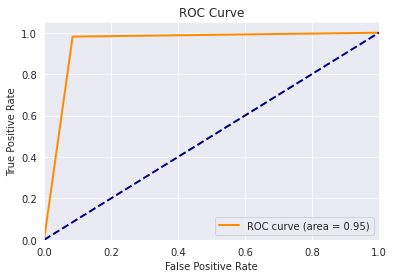

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Multinomial NB Classifier model..
 
Best Random_state number for splitting the data is:  129
 
Accuracy score for Train : 88.19%
Accuracy score for Test : 88.18%
Confusion Matrix :

[[1094   32]
 [ 235  897]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1126
           1       0.97      0.79      0.87      1132

    accuracy                           0.88      2258
   macro avg       0.89      0.88      0.88      2258
weighted avg       0.89      0.88      0.88      2258

Cross Validation score at best cv=5 is : 87.90%


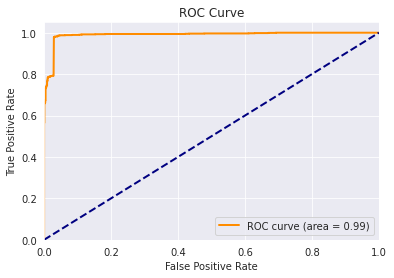

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Bernoulli NB Classifier model..
 
Best Random_state number for splitting the data is:  74
 
Accuracy score for Train : 97.42%
Accuracy score for Test : 97.34%
Confusion Matrix :

[[1087   46]
 [  14 1111]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1133
           1       0.96      0.99      0.97      1125

    accuracy                           0.97      2258
   macro avg       0.97      0.97      0.97      2258
weighted avg       0.97      0.97      0.97      2258

Cross Validation score at best cv=11 is : 96.70%


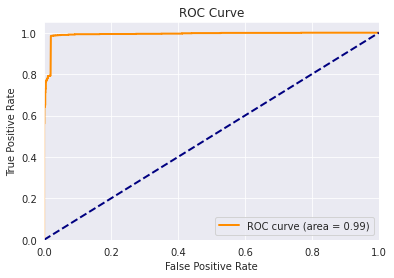

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
1,Multinomial NB Classifier,129,88.19,88.18,0.28,5,87.898103
2,Bernoulli NB Classifier,74,97.42,97.34,0.64,11,96.701117
0,Gaussian NB Classifier,112,96.80,94.91,1.66,3,93.246296


In [46]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [gnb,mnb,bnb]
models_name = ['Gaussian NB Classifier',
               'Multinomial NB Classifier',
               'Bernoulli NB Classifier']


dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(x1, Y, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(x1, Y, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train = False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

## 
# using TFIDF as a text vectorizing method & checking the model accuracy

In [47]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, x2, Y, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,x2, Y, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [48]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gaussian NB Classifier model..
 
Best Random_state number for splitting the data is:  97
 
Accuracy score for Train : 93.98%
Accuracy score for Test : 93.98%
Confusion Matrix :

[[ 980  135]
 [   1 1142]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      1115
           1       0.89      1.00      0.94      1143

    accuracy                           0.94      2258
   macro avg       0.95      0.94      0.94      2258
weighted avg       0.95      0.94      0.94      2258

Cross Validation score at best cv=10 is : 93.64%


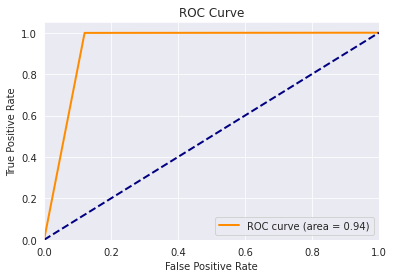

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Multinomial NB Classifier model..
 
Best Random_state number for splitting the data is:  74
 
Accuracy score for Train : 97.74%
Accuracy score for Test : 97.74%
Confusion Matrix :

[[1095   38]
 [  13 1112]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1133
           1       0.97      0.99      0.98      1125

    accuracy                           0.98      2258
   macro avg       0.98      0.98      0.98      2258
weighted avg       0.98      0.98      0.98      2258

Cross Validation score at best cv=10 is : 97.74%


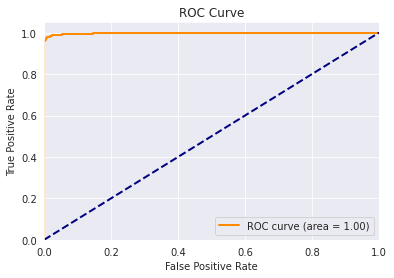

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Bernoulli NB Classifier model..
 
Best Random_state number for splitting the data is:  111
 
Accuracy score for Train : 98.85%
Accuracy score for Test : 98.85%
Confusion Matrix :

[[1104    0]
 [  26 1128]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1104
           1       1.00      0.98      0.99      1154

    accuracy                           0.99      2258
   macro avg       0.99      0.99      0.99      2258
weighted avg       0.99      0.99      0.99      2258

Cross Validation score at best cv=10 is : 98.80%


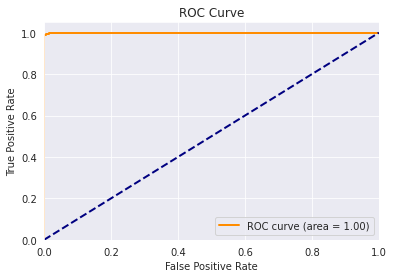

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
1,Multinomial NB Classifier,74,97.74,97.74,0.00,10,97.741550
2,Bernoulli NB Classifier,111,98.85,98.85,0.05,10,98.804611
0,Gaussian NB Classifier,97,93.98,93.98,0.34,10,93.644881


In [49]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [gnb2,mnb2,bnb2]
models_name = ['Gaussian NB Classifier',
               'Multinomial NB Classifier',
               'Bernoulli NB Classifier']

dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(x2, Y, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(x2, Y, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

## 
# Using Bidirectional LSTM

In [50]:
from tensorflow.keras.layers import TextVectorization

In [51]:
X = data3['text_lemmatize']
y = data3["Target"]

In [52]:
MAX_FEATURES = 10000 # number of words in the vocab

In [53]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=2500,
                               output_mode='int')

In [54]:
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)

In [55]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
vectorized_text, Y = oversample.fit_resample(vectorized_text, y)
Y.value_counts()

0    4516
1    4516
Name: Target, dtype: int64

In [56]:
vectorized_text

array([[   6, 5386,  271, ...,    0,    0,    0],
       [   9,  221, 1233, ...,    0,    0,    0],
       [  11,  412,  830, ...,    0,    0,    0],
       ...,
       [ 523, 1155,   66, ...,    0,    0,    0],
       [ 237, 1886, 1001, ...,    0,    0,    0],
       [  20,  191,   56, ...,    0,    0,    0]])

In [57]:
vectorized_text.shape

(9032, 2500)

In [58]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, Y))
dataset = dataset.cache()
dataset = dataset.shuffle(800)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [59]:
## Splitting the data into train test & validation set
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.15))
test = dataset.skip(int(len(dataset)*.85)).take(int(len(dataset)*.15))

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [69]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES, 32))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers with dropout layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Final layer 
model.add(Dense(1, activation='sigmoid'))

In [70]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

In [71]:
# Summary about the Neural network architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                      

In [72]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [73]:
## training the LSTM model 
history = model.fit(train, epochs=10, batch_size = 32, validation_data=val,  callbacks=[callback])

Epoch 1/10
395/395 [==============================] - 53s 120ms/step - loss: 0.2298 - accuracy: 0.9123 - val_loss: 0.0897 - val_accuracy: 0.9613
Epoch 2/10
395/395 [==============================] - 45s 114ms/step - loss: 0.0989 - accuracy: 0.9668 - val_loss: 0.0824 - val_accuracy: 0.9695
Epoch 3/10
395/395 [==============================] - 46s 116ms/step - loss: 0.0687 - accuracy: 0.9775 - val_loss: 0.0807 - val_accuracy: 0.9546
Epoch 4/10
395/395 [==============================] - 46s 116ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0849 - val_accuracy: 0.9606
Epoch 5/10
395/395 [==============================] - 46s 116ms/step - loss: 0.0440 - accuracy: 0.9851 - val_loss: 0.1012 - val_accuracy: 0.9315
Epoch 6/10
395/395 [==============================] - 46s 116ms/step - loss: 0.0336 - accuracy: 0.9903 - val_loss: 0.1317 - val_accuracy: 0.9390
Epoch 7/10
395/395 [==============================] - 46s 116ms/step - loss: 0.0203 - accuracy: 0.9945 - val_loss: 0.1348 - val_ac

<Figure size 576x360 with 0 Axes>

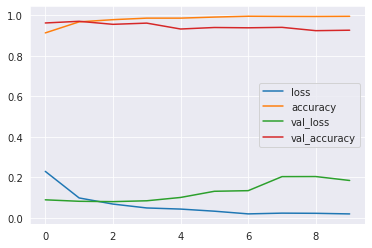

In [74]:
#plotting the score & loss pattern in 10 epochs
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [75]:
## creating a batch for testing the model's performance
batch_X, batch_y = test.as_numpy_iterator().next()

In [76]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 779ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [79]:
## checking the model performance

from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)


print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9983525276184082, Recall:0.9105935096740723, Accuracy:0.5


In [80]:
## saving the model
model.save('spam_message_Bi-LSTM_10epochs_3callback.h5')

In [81]:
## sample to test the LSTM model
sample_test = data3['text_lemmatize'].sample(50)

In [82]:
sample_test

2808                                         tell who pls
809                                          hey got mail
2382    lol different go trying find every real life p...
436     hey hey werethe monkeespeople say monkeyaround...
2545    hello darling today would love chat dont tell ...
294                cant pick phone right pls send message
2765                                               alrite
1035    working technical support voice process networ...
1566                                 u download fring app
3928    mm umma ask vava also come tell play later tog...
417     send ur friend receive something ur voice spea...
1342    please reserve ticket saturday eve chennai thi...
10      gonna home soon want talk stuff anymore tonigh...
1095                       cancel cheyyamo get money back
3359    lol know hey someone great inpersonation flea ...
4323                                             bus love
1792    play one day last year know even though good t...
1766    hey go

In [83]:
sample_test_label = data3['label'].loc[sample_test.index]

In [84]:
# model_test = tf.keras.models.load_model('spam_message_20epochs.h5')
model_test = tf.keras.models.load_model('spam_message_Bi-LSTM_10epochs_3callback.h5')

In [85]:
result = model_test.predict(vectorizer(sample_test))
results = (result > 0.5).astype(int)

2/2 [==============================] - 1s 91ms/step


In [86]:
ham_spam_dict = {1:'spam', 0:'ham'}
predictions = pd.DataFrame(results, columns = ['Predicted'])
predictions['Predicted'] = predictions['Predicted'].map(ham_spam_dict)

In [87]:
test_predictions = pd.concat([sample_test.reset_index(drop=True), sample_test_label.reset_index(drop=True),predictions['Predicted']], axis=1)

In [88]:
#checking predictions with the actuallabel
test_predictions

,text_lemmatize,label,Predicted
0,tell who pls,ham,ham
1,hey got mail,ham,ham
2,lol different go trying find every real life p...,ham,ham
3,hey hey werethe monkeespeople say monkeyaround...,ham,ham
4,hello darling today would love chat dont tell ...,spam,spam
5,cant pick phone right pls send message,ham,ham
6,alrite,ham,ham
7,working technical support voice process networ...,ham,ham
8,u download fring app,ham,ham
9,mm umma ask vava also come tell play later tog...,ham,ham


# 
## From all 3 methods of model selection we found that the Bernaulii NB model performs best with the TFIDF vectorization on text message feature.
## We selected sklearn’s Tfidf Vectorizer as a text vectorisation method & Bernoulli NB Classifier for the following reasons:
### Maximum ACCURACY with high Precision value.
### Maximum Value of area under ROC curve
# 
## Hyper parameter tuning for Bernoulli NB Classifier on the TFIDF vectorised data

In [89]:
X2 = tfidf.fit_transform(data3['text_lemmatize']).toarray()
y = data3["Target"]

oversample_final = SMOTE()
X2, y = oversample.fit_resample(X2, y)
y.value_counts()

x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 111)

In [90]:
param_grid_bnb = {'alpha':[0.001, 0.002, 0.005, 0.05, 0.02, 0.01, 0.1, 0.2, 0.5, 1]}

In [91]:
bnb_grid = GridSearchCV(estimator = bnb2,
                       param_grid = param_grid_bnb,
                       verbose = 2,
                       scoring = 'accuracy')

In [92]:
bnb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................................alpha=0.001; total time=   0.3s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.4s
[CV] END ........................................alpha=0.001; total time=   0.3s
[CV] END ........................................alpha=0.002; total time=   0.4s
[CV] END ........................................alpha=0.002; total time=   0.5s
[CV] END ........................................alpha=0.002; total time=   0.4s
[CV] END ........................................alpha=0.002; total time=   0.5s
[CV] END ........................................alpha=0.002; total time=   0.4s
[CV] END ........................................alpha=0.005; total time=   0.3s
[CV] END .......................................

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.001, 0.002, 0.005, 0.05, 0.02, 0.01, 0.1,
                                   0.2, 0.5, 1]},
             scoring='accuracy', verbose=2)

In [93]:
bnb_grid.best_score_

0.9898138629835339

In [94]:
bnb_grid.best_params_

{'alpha': 0.02}

In [96]:
bnb2_final = BernoulliNB(alpha = 0.02)

In [97]:
bnb2_final.fit(x_train,y_train)
y_pred=bnb2_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9902568644818424


## Accuracy is increased from 98.85% to 99%
### 

Confusion Matrix :

[[1104    0]
 [  22 1132]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1104
           1       1.00      0.98      0.99      1154

    accuracy                           0.99      2258
   macro avg       0.99      0.99      0.99      2258
weighted avg       0.99      0.99      0.99      2258

Cross Validation score at best cv = 11 is : 99.06%


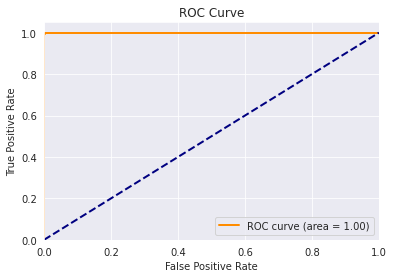

In [98]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(bnb2_final,X2, y, cv=10, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 11 is : {cv_score*100:.2f}%")
y_predict_probabilities = bnb2_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## After hyperparameter tuning we see that accuracy of the model increased. 
# 
## Saving the models using pickle & checking on test set.

In [100]:
import pickle

In [102]:
filename='BernoulliNB_sms_spam.pkl'
pickle.dump(bnb2_final,open(filename,'wb'))

In [103]:
model = pickle.load(open('BernoulliNB_sms_spam.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2253,0,0
2254,1,1
2255,0,0
2256,0,0
